In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

1. Data Preprocessing

In [6]:
df1 = df.copy()

Xử lý các feature thiếu dữ liệu

In [7]:
df1["education"].fillna(df1["education"].mode()[0], inplace= True)
df1["cigsPerDay"].fillna(df1["cigsPerDay"].median(), inplace= True)
df1["BPMeds"].fillna(df1["BPMeds"].mode()[0], inplace= True)
df1["totChol"].fillna(df1["totChol"].median(), inplace= True)
df1["BMI"].fillna(df1["BMI"].median(), inplace= True)
df1["heartRate"].fillna(df1["heartRate"].median(), inplace= True)
df1["glucose"].fillna(df1["glucose"].mean(), inplace= True)

In [8]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Data visualization

<Axes: xlabel='TenYearCHD', ylabel='count'>

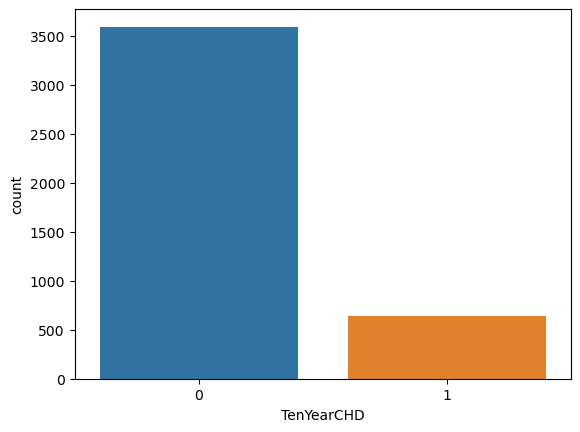

In [9]:
sns.countplot(data= df1, x= "TenYearCHD")

In [10]:
corr_matrix = df1.corr().abs()

C:\Users\truon\AppData\Local\Temp\ipykernel_9812\2420006150.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


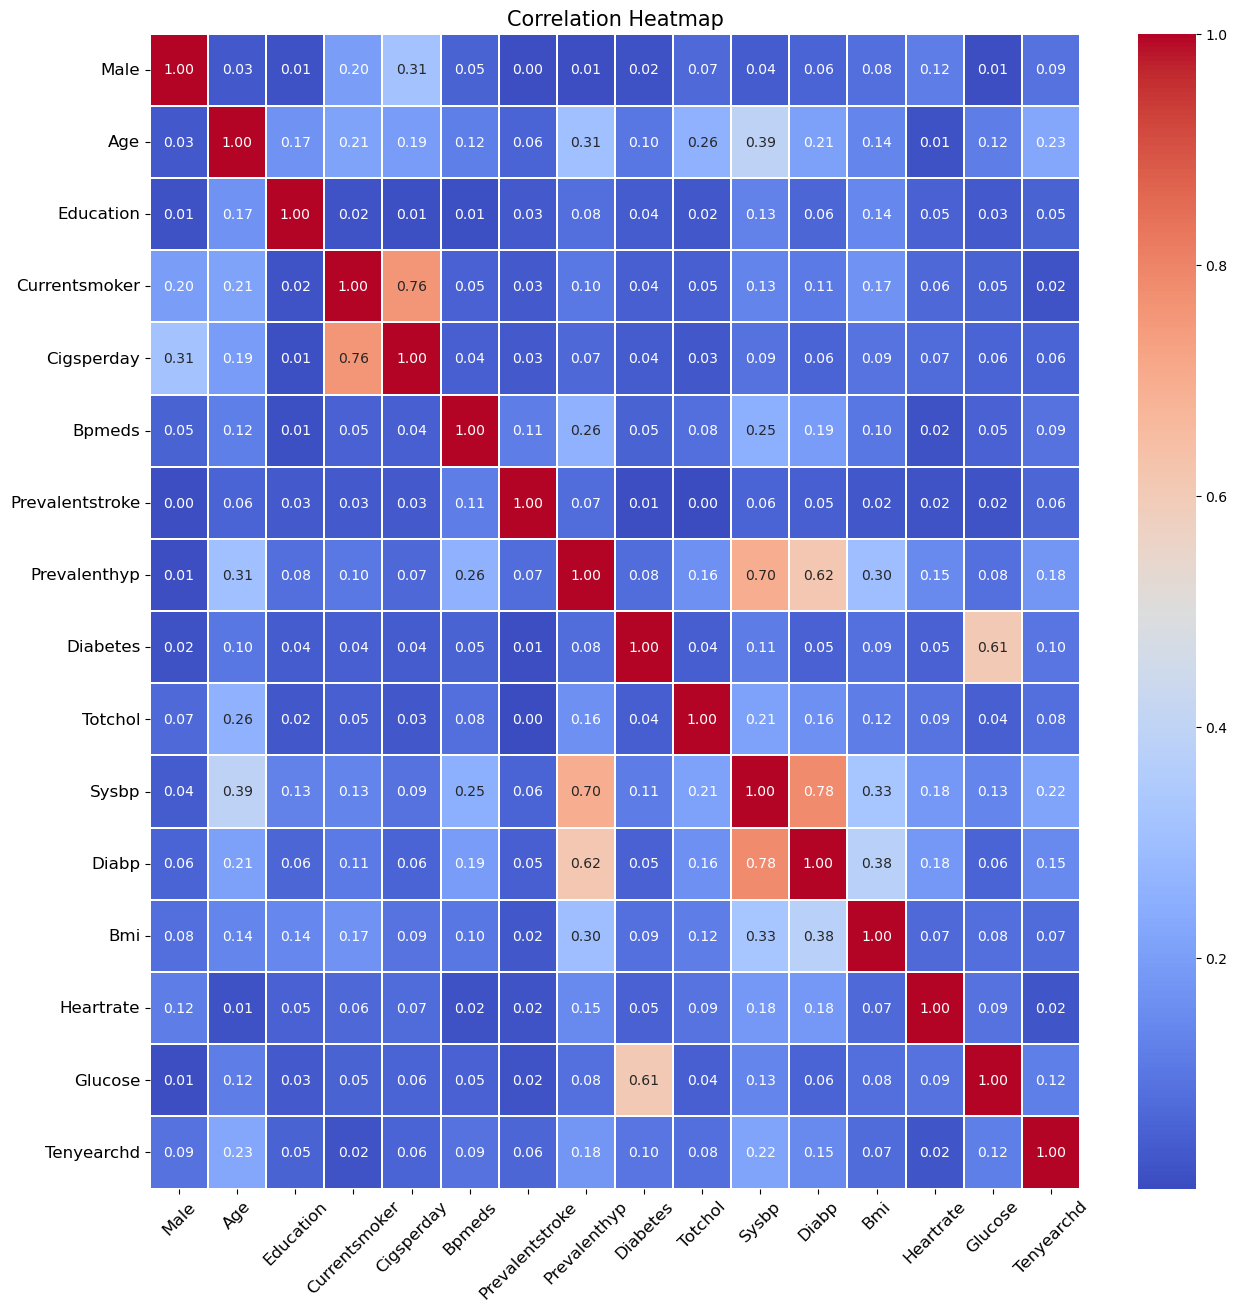

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f', annot_kws={'size': 10},
            linecolor='white', linewidths=0.05)
ax.set_title('Correlation Heatmap', fontsize=15)
x_ticks = [i.title() for i in corr_matrix.columns]
y_ticks = [i.title() for i in corr_matrix.index]
ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)
ax.set_yticklabels(y_ticks, rotation=0, fontsize=12)
fig.show()

In [49]:
num_feature = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

f:\Anaconda\envs\torch-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\envs\torch-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\envs\torch-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\envs\torch-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

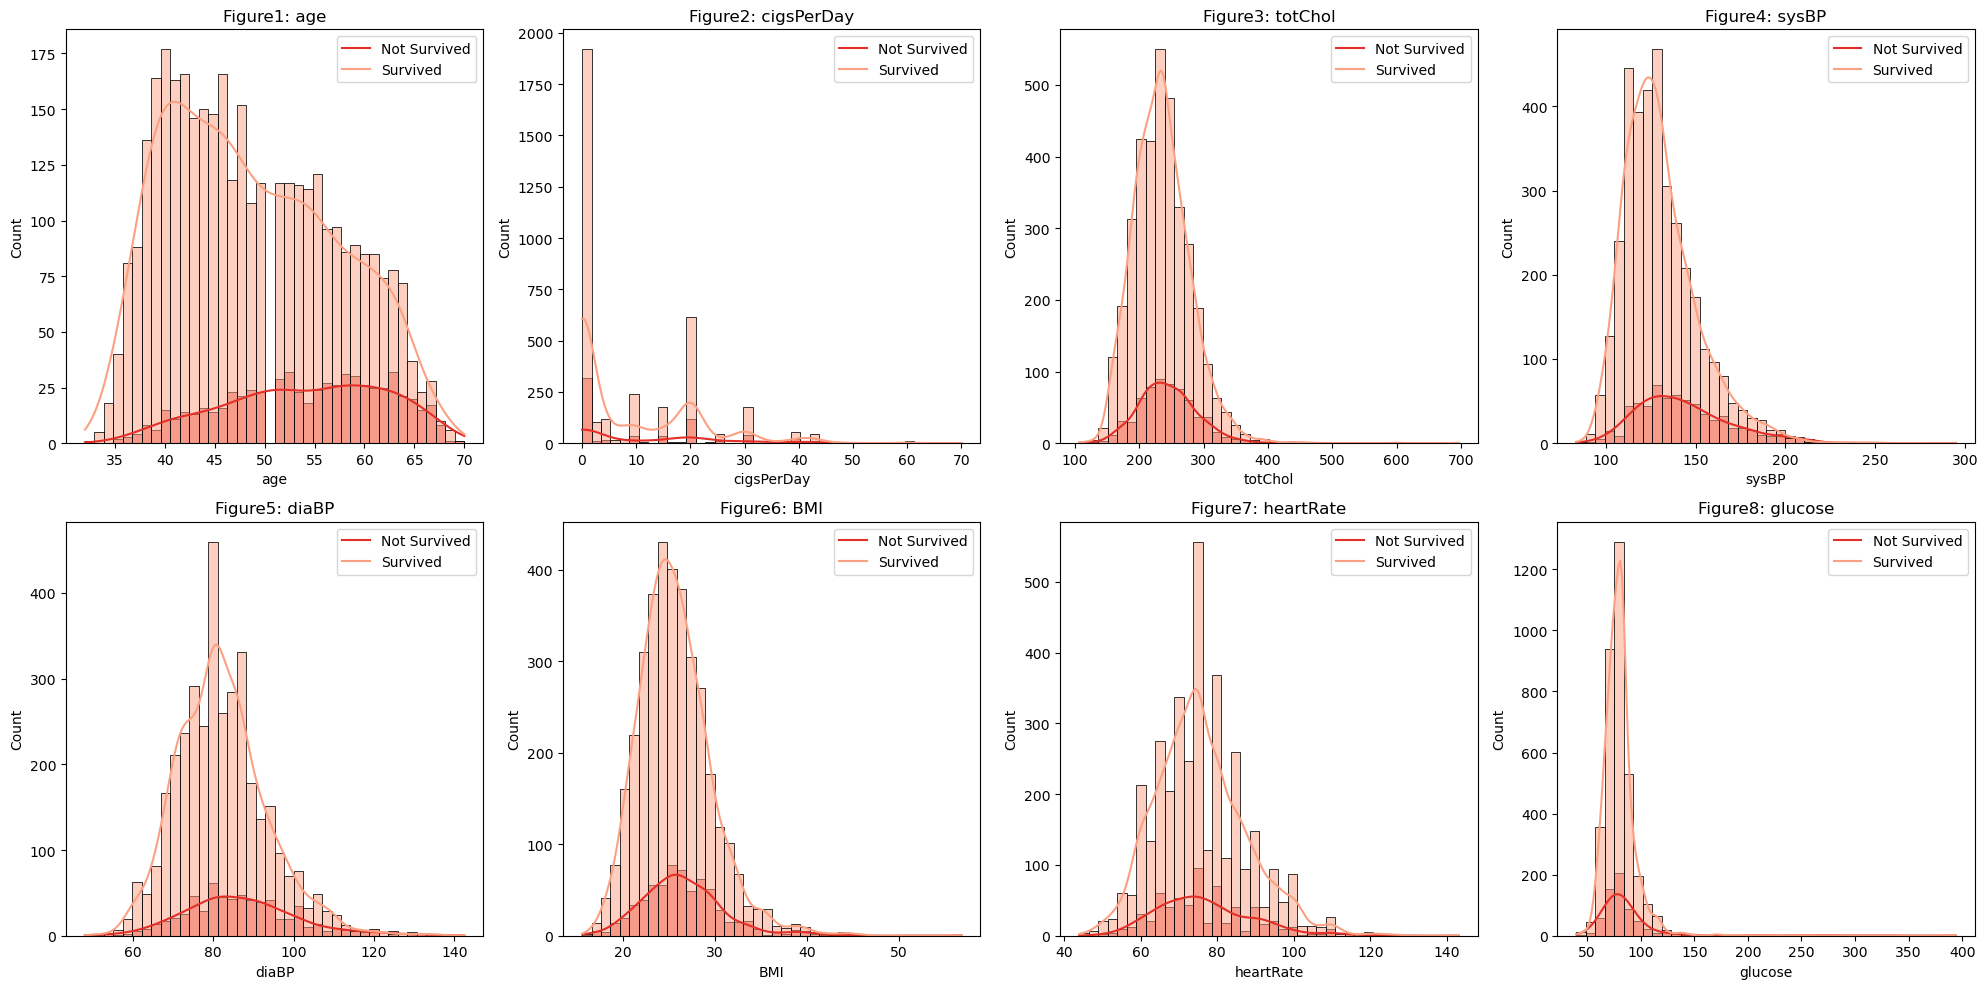

In [50]:
n_rows = 2
n_cols = 4

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))

for row in range(0, n_rows):
    for col in range(0, n_cols):
        index = row * n_cols + col
        if index < len(num_feature):
            ax_i = ax[row, col]
            sns.histplot(data=df1, x= num_feature[index], hue= "TenYearCHD", palette= "Reds", ax= ax_i, bins= 40, kde= True)
            ax_i.set_title(f"Figure{index + 1}: {num_feature[index]}")
            ax_i.legend(title= '', loc= "upper right", labels= ["Not Survived", "Survived"])
plt.tight_layout() # Sắp xếp các subplot 1 cách hợp lý
plt.show()

In [51]:
col = df1.columns.tolist()

In [52]:
df_tmp = df1.copy()

In [53]:
for i in col:
    if i not in num_feature:
        df_tmp.drop(i, axis=1, inplace=True)

In [54]:
df_tmp

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,81.963655
4237,52,0.0,269.0,133.5,83.0,21.47,80.0,107.000000
4238,40,0.0,185.0,141.0,98.0,25.60,67.0,72.000000


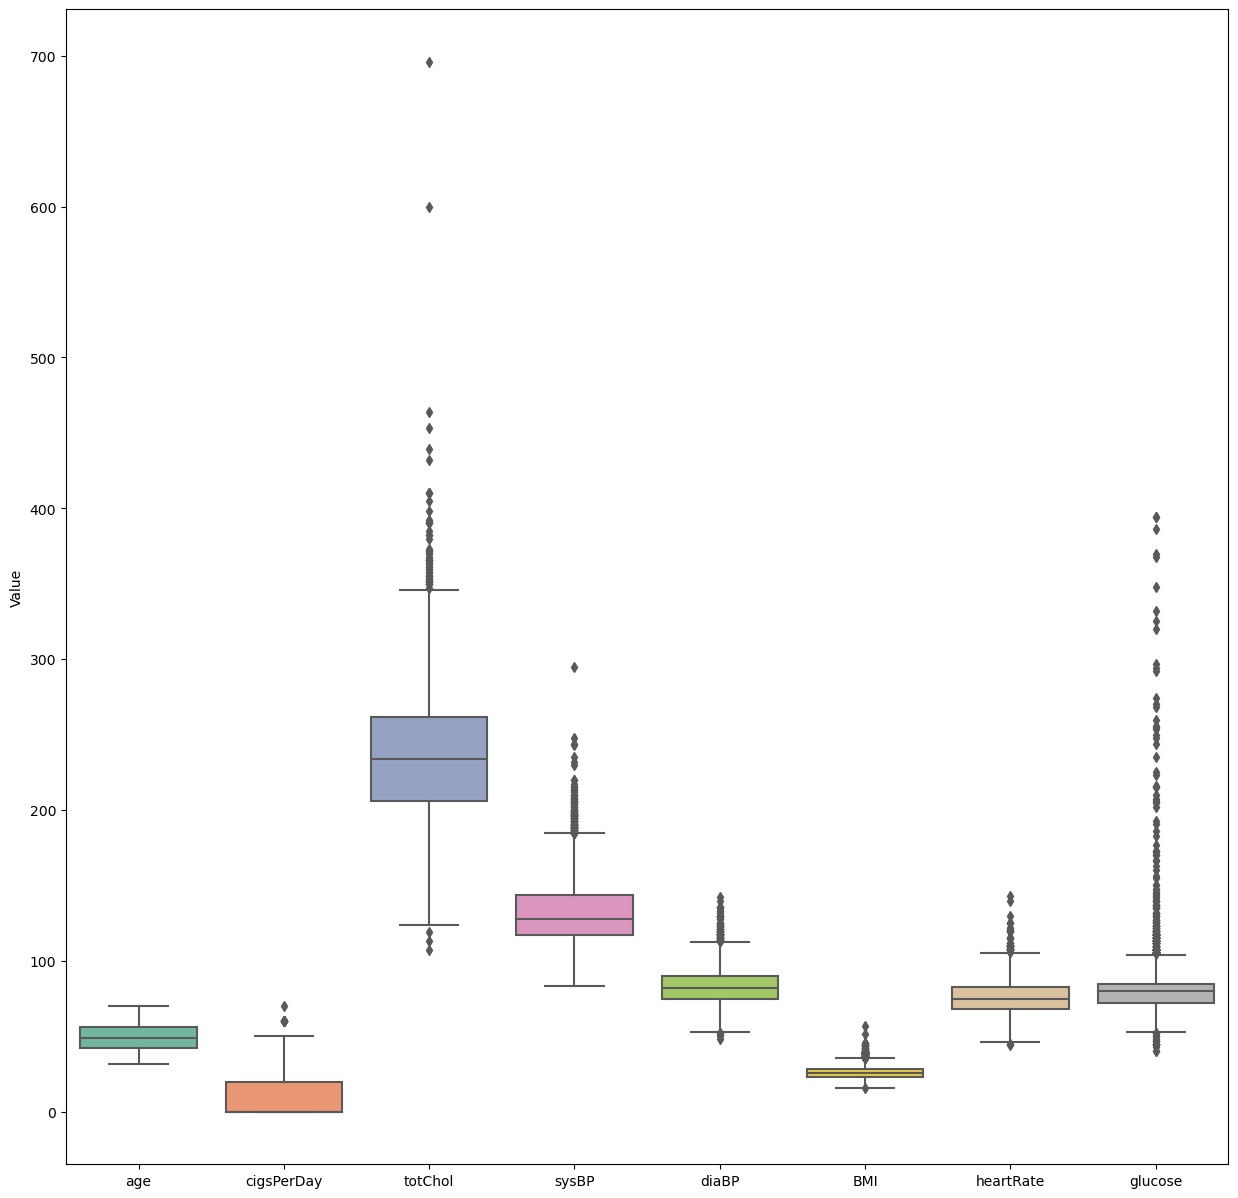

In [55]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=df_tmp, palette="Set2")
plt.ylabel('Value')
plt.show()

In [56]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Tìm các cặp đặc trưng có tương quan cao
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.7)]

In [57]:
to_drop

['cigsPerDay', 'diaBP']

In [58]:
df1.drop(to_drop, axis=1, inplace=True)

In [59]:
process_noise = ['totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']

In [60]:
df_iqr = df1.copy()

In [61]:
for _encode in process_noise:
    q25, q75 = np.quantile(df_iqr[_encode], 0.25), np.quantile(df_iqr[_encode], 0.75)
    iqr = q75 - q25
    lower, upper = q25 - 1.25*iqr, q75 + 1.25*iqr
    df_iqr = df_iqr[(df_iqr[_encode] < upper) & (df_iqr[_encode] > lower)]

In [62]:
x = df_iqr.drop('TenYearCHD', axis=1)
y = df_iqr['TenYearCHD']

In [63]:
x

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000
1,0,46,2.0,0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000
2,1,48,1.0,1,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000
4,0,46,3.0,1,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000
6,0,63,1.0,0,0.0,0,0,0,205.0,138.0,33.11,60.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,0.0,0,0,0,207.0,126.5,19.71,65.0,68.000000
4235,0,48,2.0,1,0.0,0,0,0,248.0,131.0,22.00,84.0,86.000000
4236,0,44,1.0,1,0.0,0,0,0,210.0,126.5,19.16,86.0,81.963655
4238,1,40,3.0,0,0.0,0,1,0,185.0,141.0,25.60,67.0,72.000000


In [64]:
y

0       0
1       0
2       0
4       0
6       1
       ..
4234    0
4235    0
4236    0
4238    0
4239    0
Name: TenYearCHD, Length: 3442, dtype: int64

In [65]:
from imblearn.over_sampling import RandomOverSampler
smote = RandomOverSampler(random_state=42)
x, y = smote.fit_resample(x, y)

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scale = MinMaxScaler(feature_range=(-1, 1))
x = scale.fit_transform(x)

In [67]:
x_dnn = x
y_dnn = y

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

2. Tìm tham số tối ưu của model RandomForest

In [70]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#     'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110],
#     'max_depth': [None, 2, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# # Khởi tạo GridSearchCV với RandomForestClassifier và danh sách tham số
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy')

# # Tiến hành tìm kiếm siêu tham số tốt nhất cho RandomForestClassifier
# grid_search.fit(x_train, y_train)

# # In ra các tham số tốt nhất và độ chính xác tương ứng
# print("Best parameters found:", grid_search.best_params_)
# print("Best accuracy found:", grid_search.best_score_)

3. Model RandomForest

In [71]:
# from sklearn.ensemble import RandomForestClassifier
# best_params = grid_search.best_params_
# model = RandomForestClassifier(n_estimators=best_params['n_estimators'], random_state= 42, class_weight='balanced', 
#                                max_depth=best_params['max_depth'],
#                                min_samples_split=best_params['min_samples_split'],
#                                min_samples_leaf=best_params['min_samples_leaf'])
# model.fit(x_train, y_train)

In [72]:
# _score = model.score(x_test, y_test)
# print(_score)

In [73]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# y_pred = model.predict(x_test)

In [74]:
# cm = confusion_matrix(y_test, y_pred)
# plt.title('Confusion Matrix')
# sns.heatmap(cm, annot=True, fmt='d')
# plt.show()

In [75]:
# print(classification_report(y_test, y_pred))

4. Thử nghiệm trên mô hình DNN

4.1. Tìm siêu tham số trong mạng nơ-ron

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_val_test, y_train, y_val_test = train_test_split(x_dnn, y_dnn, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

In [77]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
def build_model(hp):
    model = Sequential()
    X1 = hp.Int("unit1", min_value=64, max_value=128, step=32)
    X2 = hp.Int("unit2", min_value=32, max_value=80, step=16)
    X3 = hp.Int("unit3", min_value=16, max_value=64, step=16)
    batch_size = hp.Choice("batch_size", values=[64, 128])

    model.add(Dense(units=X1, activation="relu"))
    model.add(Dense(units=X2, activation="relu"))
    model.add(Dense(units=X3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    lr = hp.Choice("lr",values=[1e-2,1e-3])

    model.compile(optimizer=Adam(learning_rate=lr), loss = BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

In [78]:
# Khởi tạo Tuner
tuner = kt.Hyperband(build_model, objective="val_accuracy")

# Keras Callbacks - Early Stop
stop_early = EarlyStopping(monitor="val_loss", patience=5)

In [79]:
# Bắt đầu search xem bộ giá trị HP nào tốt nhất
tuner.search(x_train, y_train, validation_data=(x_val, y_val), callbacks=[stop_early])

Trial 232 Complete [00h 00m 22s]
val_accuracy: 0.8564273715019226

Best val_accuracy So Far: 0.9015024900436401
Total elapsed time: 00h 49m 10s

Search: Running Trial #233

Value             |Best Value So Far |Hyperparameter
96                |128               |unit1
64                |80                |unit2
64                |64                |unit3
64                |128               |batch_size
0.001             |0.001             |lr
34                |100               |tuner/epochs
12                |34                |tuner/initial_epoch
2                 |3                 |tuner/bracket
1                 |3                 |tuner/round
0212              |0203              |tuner/trial_id

Epoch 13/34
150/150 [==============================] - 4s 10ms/step - loss: 0.3918 - accuracy: 0.8329 - val_loss: 0.5718 - val_accuracy: 0.7546
Epoch 14/34
150/150 [==============================] - 1s 7ms/step - loss: 0.3756 - accuracy: 0.8317 - val_loss: 0.5281 - val_accuracy: 0.7513



KeyboardInterrupt



In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]

print("Best unit1 unit2 unit 3 = ",best_hps.get('unit1'), ' ',best_hps.get('unit2'), ' ', best_hps.get('unit3'), '\n',"Best batch_size = ", best_hps.get('batch_size'), "optimal learning rate = ", best_hps.get('lr'))

Best unit1 unit2 unit 3 =  128   80   64 
 Best batch_size =  128 optimal learning rate =  0.001


4.2. Xây dựng model trên tham số search

In [81]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[stop_early]) # Hàm train thông thường

Epoch 1/50


f:\Anaconda\envs\torch-env\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


150/150 [==============================] - 53s 66ms/step - loss: 0.6257 - accuracy: 0.6554 - val_loss: 0.6230 - val_accuracy: 0.6427
Epoch 2/50
150/150 [==============================] - 3s 21ms/step - loss: 0.5980 - accuracy: 0.6865 - val_loss: 0.6133 - val_accuracy: 0.6578
Epoch 3/50
150/150 [==============================] - 4s 23ms/step - loss: 0.5847 - accuracy: 0.6928 - val_loss: 0.6191 - val_accuracy: 0.6511
Epoch 4/50
150/150 [==============================] - 4s 27ms/step - loss: 0.5687 - accuracy: 0.7061 - val_loss: 0.6118 - val_accuracy: 0.6628
Epoch 5/50
150/150 [==============================] - 3s 18ms/step - loss: 0.5507 - accuracy: 0.7178 - val_loss: 0.5891 - val_accuracy: 0.6995
Epoch 6/50
150/150 [==============================] - 4s 25ms/step - loss: 0.5287 - accuracy: 0.7368 - val_loss: 0.5723 - val_accuracy: 0.7062
Epoch 7/50
150/150 [==============================] - 5s 31ms/step - loss: 0.5069 - accuracy: 0.7586 - val_loss: 0.5569 - val_accuracy: 0.7162
Epoch 8/5

In [82]:
loss, acc = best_model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 9ms/step - loss: 0.3503 - accuracy: 0.9032


Note: Overfitting 

19/19 [==============================] - 0s 9ms/step


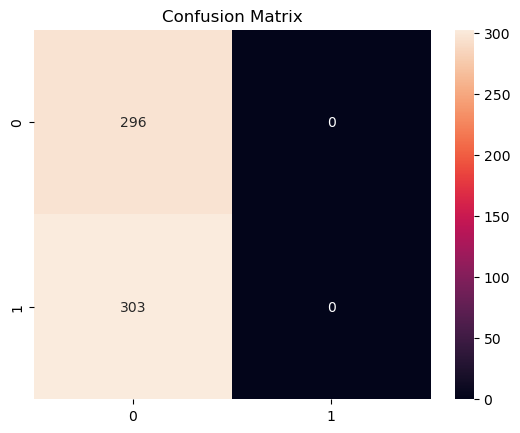

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d')
plt.show()